🧠 Scenario

You are a data analyst working for a global public-policy organization studying the relationship between health investment and national well-being.
Your task is to identify how economic and social factors (like GDP, education, and healthcare spending) influence life expectancy across countries.## 

## Defining the Research Goal: How do health and economic indicators influence life expectancy?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Global Health & Economic Development Analysis.csv")

In [3]:
pd.set_option('display.max_columns', None) 

In [4]:
df.head(3)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


In [5]:
df.shape

(2938, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [8]:
df.columns =['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'Percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'Under_five _Deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'Thinness(1-19_years)', 'Thinness(5-9_years)',
       'Income_composition_of_resources', 'Schooling']

In [9]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life_Expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
Percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
Under_five _Deaths                   0
Polio                               19
Total_Expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness(1-19_years)                34
Thinness(5-9_years)                 34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [10]:
df[df['Life_Expectancy'].isna()]

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under_five _Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness(1-19_years),Thinness(5-9_years),Income_composition_of_resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,82.8,0,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,58.4,0,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,81.6,0,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,NaN,0,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,87.3,0,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,77.3,0,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,83.3,0,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,5.2,0,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,NaN,0,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,79.3,0,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


In [11]:
df['Life_Expectancy'] = df['Life_Expectancy'].fillna(df['Life_Expectancy'].median())

In [12]:
df['Adult_Mortality'] = df['Adult_Mortality'].fillna(df['Adult_Mortality'].median())

In [13]:
df['Alcohol'].unique()

array([0.01, 0.03, 0.02, ..., 2.44, 3.56, 4.57])

In [14]:
df['Alcohol'] = df['Alcohol'].fillna(df['Alcohol'].mean())

In [15]:
df['Hepatitis_B'].unique()

array([65., 62., 64., 67., 68., 66., 63., 99., 98., 97., 96., 95., 94.,
       91.,  9.,  8., 83., 81., nan, 77., 75., 72., 61., 69., 73., 85.,
       84., 88., 93., 89., 78., 55., 92., 86., 44., 33., 74., 52., 49.,
        5., 51., 21., 45., 11., 87., 18., 56.,  7.,  6., 76., 82., 79.,
       15., 36., 48.,  1.,  4., 42., 28., 14., 47., 23., 46., 37., 39.,
       24., 17., 27., 25., 16.,  2., 35., 29., 26., 54., 57., 38., 59.,
       71., 43., 58., 41., 31., 12., 32., 22., 53., 19.])

In [16]:
df['Hepatitis_B'].describe()

count    2385.000000
mean       80.940461
std        25.070016
min         1.000000
25%        77.000000
50%        92.000000
75%        97.000000
max        99.000000
Name: Hepatitis_B, dtype: float64

In [17]:
df['Hepatitis_B'] = df['Hepatitis_B'].fillna(df['Hepatitis_B'].mean())

In [18]:
df['BMI'].unique()

array([19.1, 18.6, 18.1, 17.6, 17.2, 16.7, 16.2, 15.7, 15.2, 14.7, 14.2,
       13.8, 13.4, 13. , 12.6, 12.2, 58. , 57.2, 56.5, 55.8, 55.1, 54.3,
       53.5, 52.6, 51.7,  5.8, 49.9, 48.9, 47.9, 46.9, 46. , 45. , 59.5,
       58.4, 56.1, 55. , 53.9, 52.8, 51.8, 49.8, 47. , 46.1, 45.3, 44.4,
       23.3, 22.7, 22.1, 21.5, 21. ,  2.4, 19.8, 19.3, 18.8, 18.2, 17.7,
       16.8, 16.3, 15.8, 15.4, 47.7, 46.4, 45.7, 45.1, 43.8, 43.2, 42.6,
       42. , 41.4,  4.8,  4.1, 39.5, 38.9, 38.2, 62.8, 62.2, 61.6, 61. ,
        6.4, 59.8, 59.2, 58.6, 57.5, 56.9, 56.3, 55.7, 54.6, 54. , 54.9,
       54.1, 53.3, 51.9, 51.2,  5.7,  5.1, 49.7, 49.2, 48.8, 48.4, 48.1,
       47.8, 47.4, 47.1, 66.6, 66.1, 65.5, 65. , 64.4, 63.9, 63.4, 62.9,
       62.5, 62. , 61.5,  6.9,  6.3, 59.6, 59. , 58.2, 57.6, 57.1, 56.6,
       55.2, 54.7, 54.2, 53.7, 53.2, 52.7, 52.2,  5.6, 52.5, 51.5, 48. ,
       47.3, 46.6, 45.9, 44.7, 44.2, 43.6, 43.1, 42.1, 64.5, 63.8, 63.2,
       62.6, 61.3,  6.7,  6.1, 59.4, 58.7, 58.1, 57

In [19]:
df['BMI'].describe()

count    2904.000000
mean       38.321247
std        20.044034
min         1.000000
25%        19.300000
50%        43.500000
75%        56.200000
max        87.300000
Name: BMI, dtype: float64

In [20]:
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [21]:
df['Polio'] = df['Polio'].fillna(df['Polio'].mean())

In [22]:
df['Total_Expenditure'].describe()

count    2712.00000
mean        5.93819
std         2.49832
min         0.37000
25%         4.26000
50%         5.75500
75%         7.49250
max        17.60000
Name: Total_Expenditure, dtype: float64

In [23]:
df['Total_Expenditure'] = df['Total_Expenditure'].fillna(df['Total_Expenditure'].mean)

In [24]:
df['Diphtheria'] =  df['Diphtheria'].fillna(df['Diphtheria'].median)

In [25]:
df['GDP'].isnull().sum()

np.int64(448)

In [26]:
df['GDP'].max()

119172.7418

In [27]:
df['GDP'] =  df['GDP'].fillna(df['GDP'].mode)

In [28]:
df['Population'].unique()

array([33736494.,   327582., 31731688., ...,   125525., 12366165.,
       12222251.])

In [29]:
df['Population'].describe()

count    2.286000e+03
mean     1.275338e+07
std      6.101210e+07
min      3.400000e+01
25%      1.957932e+05
50%      1.386542e+06
75%      7.420359e+06
max      1.293859e+09
Name: Population, dtype: float64

In [30]:
df['Population'] = df['Population'].fillna(df['Population'].median())

In [31]:
df['Thinness(1-19_years)'].unique()

array([17.2, 17.5, 17.7, 17.9, 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.3,
       19.5, 19.7, 19.9,  2.1,  2.3,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,
        1.8,  1.9,  2. ,  6. ,  5.9,  6.1,  6.2,  6.3,  6.4,  6.5,  8.3,
        8.5,  8.6,  8.8,  8.9,  9.1,  9.3,  9.5,  9.6,  9.8,  1. ,  3.3,
        3.4,  3.5,  3.6,  3.7,  1.1,  0.6,  0.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  2.5,  2.6,  2.7, 18.1, 18.3, 18.5, 18.7, 18.9, 19.1,  3.8,
        3.9,  4. ,  4.1,  4.2,  4.3,  2.2,  2.4,  0.9,  0.8,  6.9,  7.1,
        7.2,  7.4,  7.6,  7.8,  7.9,  8.1,  8.7,  9.7, 15.4, 15.7, 15.9,
       16.1, 16.3, 16.6, 16.8, 17.1, 17.3, 17.8, 18. ,  6.7,  7. ,  7.3,
        7.7,  8. ,  8.4,  9.2, 11.4, 11.8, 12.3,  5.7,  5.8,  6.6,  6.8,
        8.2,  9. , 11. , 11.2,  7.5,  5.5,  5.6,  9.4, 11.1, 11.3, 11.5,
       11.6,  0.5,  9.9,  4.4,  4.5,  4.7,  4.8,  5. ,  5.1,  5.3,  0.1,
        4.9,  5.2,  5.4, 11.7, 11.9, 12.1, 12.2, 12.4,  4.6, 26.7, 26.8,
       26.9, 27. , 27.1, 27.2, 27.3, 27.4, 27.5, 27

In [32]:
df['Thinness(1-19_years)'].value_counts()

Thinness(1-19_years)
1.0     74
1.9     65
0.8     64
0.7     63
1.2     62
        ..
21.8     1
22.2     1
22.0     1
14.9     1
15.8     1
Name: count, Length: 200, dtype: int64

In [33]:
df['Thinness(1-19_years)'] = df['Thinness(1-19_years)'].fillna(df['Thinness(1-19_years)'].mean())

In [34]:
df['Thinness(5-9_years)'] = df['Thinness(5-9_years)'].fillna(df['Thinness(5-9_years)'].mean())

In [35]:
df['Income_composition_of_resources'].unique()

array([0.479, 0.476, 0.47 , 0.463, 0.454, 0.448, 0.434, 0.433, 0.415,
       0.405, 0.396, 0.381, 0.373, 0.341, 0.34 , 0.338, 0.762, 0.761,
       0.759, 0.752, 0.738, 0.725, 0.721, 0.713, 0.703, 0.696, 0.685,
       0.681, 0.674, 0.67 , 0.662, 0.656, 0.743, 0.741, 0.737, 0.732,
       0.724, 0.714, 0.705, 0.697, 0.69 , 0.686, 0.68 , 0.673, 0.663,
       0.653, 0.644, 0.636, 0.531, 0.527, 0.523, 0.508, 0.495, 0.488,
       0.48 , 0.468, 0.439, 0.426, 0.406, 0.401, 0.391, 0.382, 0.784,
       0.782, 0.781, 0.778, 0.783, 0.788, 0.786, 0.773, 0.   , 0.826,
       0.825, 0.823, 0.822, 0.816, 0.802, 0.794, 0.792, 0.78 , 0.775,
       0.77 , 0.776, 0.771, 0.764, 0.739, 0.736, 0.729, 0.72 , 0.707,
       0.692, 0.679, 0.668, 0.657, 0.645, 0.639, 0.937, 0.936, 0.933,
       0.93 , 0.927, 0.925, 0.921, 0.918, 0.915, 0.91 , 0.908, 0.905,
       0.902, 0.899, 0.897, 0.892, 0.887, 0.884, 0.88 , 0.872, 0.87 ,
       0.864, 0.86 , 0.854, 0.848, 0.841, 0.837, 0.847, 0.833, 0.758,
       0.745, 0.742,

In [36]:
df['Income_composition_of_resources']= df['Income_composition_of_resources'].fillna(df['Income_composition_of_resources'].median())

In [37]:
df['Schooling'].unique()

array([10.1, 10. ,  9.9,  9.8,  9.5,  9.2,  8.9,  8.7,  8.4,  8.1,  7.9,
        6.8,  6.5,  6.2,  5.9,  5.5, 14.2, 13.3, 12.5, 12.2, 12. , 11.6,
       11.4, 10.8, 10.9, 10.7, 10.6, 14.4, 14. , 13.6, 13.1, 12.6, 12.3,
       11.7, 11.5, 11.1, 10.3,  9.4,  9. ,  8.5,  7.7,  7.2,  6.4,  5.1,
        4.6, 13.9, 13.8, 14.1, 14.5, 14.7,  0. , 17.3, 17.2, 17.1, 16.8,
       16.5, 16.3, 16.1, 16.4, 15.6, 15. , 12.7, 11.9, 11.2, 20.4, 20.3,
       20.1, 19.8, 19.5, 19.1, 19. , 20.7, 20.6, 20.5, 15.9, 15.7, 15.4,
       15.3, 15.1, 15.2, 14.9, 15.5, 11.8, 11. , 10.4, 12.4, 12.1, 13.7,
       13.5, 13.2, 10.2,  8.6,  8.2,  7.5,  7.3, 15.8, 14.8, 14.6, 16.6,
       16.2, 18.8, 18.6, 18.2, 18. , 12.8, 12.9,  9.3,  9.1,  6.6, 10.5,
        9.6,  8.8,  8. ,  7.6, 14.3, 13.4,  6.7,  6.3,  5.4,  4.9,  4.7,
        4.3,  3.9,  3.8,  3.6,  3.5,  3.4,  5.6,  5.2,  4.4,  4.5,  nan,
       11.3,  9.7,  8.3,  7.1,  6.9,  6. ,  5.7,  5.3, 13. , 17.6, 17.7,
       16. , 19.2, 18.7, 18.4, 16.9, 16.7,  5. ,  4

In [38]:
df.loc[df['Schooling'] == 0, 'Schooling'] = np.nan   # just removing 0 values from the column

In [39]:
df['Schooling'].unique()

array([10.1, 10. ,  9.9,  9.8,  9.5,  9.2,  8.9,  8.7,  8.4,  8.1,  7.9,
        6.8,  6.5,  6.2,  5.9,  5.5, 14.2, 13.3, 12.5, 12.2, 12. , 11.6,
       11.4, 10.8, 10.9, 10.7, 10.6, 14.4, 14. , 13.6, 13.1, 12.6, 12.3,
       11.7, 11.5, 11.1, 10.3,  9.4,  9. ,  8.5,  7.7,  7.2,  6.4,  5.1,
        4.6, 13.9, 13.8, 14.1, 14.5, 14.7,  nan, 17.3, 17.2, 17.1, 16.8,
       16.5, 16.3, 16.1, 16.4, 15.6, 15. , 12.7, 11.9, 11.2, 20.4, 20.3,
       20.1, 19.8, 19.5, 19.1, 19. , 20.7, 20.6, 20.5, 15.9, 15.7, 15.4,
       15.3, 15.1, 15.2, 14.9, 15.5, 11.8, 11. , 10.4, 12.4, 12.1, 13.7,
       13.5, 13.2, 10.2,  8.6,  8.2,  7.5,  7.3, 15.8, 14.8, 14.6, 16.6,
       16.2, 18.8, 18.6, 18.2, 18. , 12.8, 12.9,  9.3,  9.1,  6.6, 10.5,
        9.6,  8.8,  8. ,  7.6, 14.3, 13.4,  6.7,  6.3,  5.4,  4.9,  4.7,
        4.3,  3.9,  3.8,  3.6,  3.5,  3.4,  5.6,  5.2,  4.4,  4.5, 11.3,
        9.7,  8.3,  7.1,  6.9,  6. ,  5.7,  5.3, 13. , 17.6, 17.7, 16. ,
       19.2, 18.7, 18.4, 16.9, 16.7,  5. ,  4. ,  3

In [40]:
df['Schooling'] = df['Schooling'].fillna(df['Schooling'].mean())

In [41]:
df.head(3)

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under_five _Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness(1-19_years),Thinness(5-9_years),Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


In [42]:
df.head(2)

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under_five _Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness(1-19_years),Thinness(5-9_years),Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


In [43]:
df.columns.tolist()

['Country',
 'Year',
 'Status',
 'Life_Expectancy',
 'Adult_Mortality',
 'infant_deaths',
 'Alcohol',
 'Percentage_expenditure',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'Under_five _Deaths',
 'Polio',
 'Total_Expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'Thinness(1-19_years)',
 'Thinness(5-9_years)',
 'Income_composition_of_resources',
 'Schooling']

In [45]:
df.head(2)

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under_five _Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness(1-19_years),Thinness(5-9_years),Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


In [46]:
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life_Expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
Percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
Under_five _Deaths                 0
Polio                              0
Total_Expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness(1-19_years)               0
Thinness(5-9_years)                0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

In [47]:
df.duplicated().sum()

np.int64(0)

In [48]:
df['GDP'] = pd.to_numeric(df['GDP'], errors='coerce')
df['Population'] = pd.to_numeric(df['Population'], errors='coerce')

In [49]:
df['Gdp_Per_Capita'] = df['GDP'] / df['Population']

In [50]:
df['life_expectancy_3yr'] = (
    df.groupby('Country')['Life_Expectancy']
      .rolling(3, min_periods=1)
      .mean()                                       # rolling we use for >- average life expectancy over the last 3 years for each year
      .reset_index(0, drop=True)
)

In [51]:
df['Total_Expenditure'] = pd.to_numeric(df['Total_Expenditure'], errors='coerce')

In [52]:
df['Spending_Efficiency'] = df['Life_Expectancy'] / df['Total_Expenditure']

## Exploratory Data Analysis (EDA)

#### 
Calculate the average life expectancy by country status (Developed vs Developing) and by year to observe global trends.

Compare mean health expenditure and GDP across years to see if economic growth aligns with better health outcomes.

Identify top and bottom countries in terms of life expectancy and health spending.

Examine the correlation between key indicators such as life expectancy, GDP, schooling, adult mortality, and health expenditure.

Analyze how life expectancy has changed over time for selected countries or regions.

Detect outliers — countries with high spending but low life expectancy or low spending but high life expectancy.

Evaluate yearly improvements or declines in life expectancy (rate of change) for each country to spot progress or stagnation.

In [53]:
df.head(2)

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under_five _Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness(1-19_years),Thinness(5-9_years),Income_composition_of_resources,Schooling,Gdp_Per_Capita,life_expectancy_3yr,Spending_Efficiency
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0.000017,65.00,7.965686
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0.001870,62.45,7.322738


In [54]:
# Average life expectancy by continent/status.
Average_Life_Country =  df.groupby('Country')['Life_Expectancy'].mean().sort_values(ascending = False).reset_index()
Average_Life_Country

,Country,Life_Expectancy
0,Japan,82.53750
1,Sweden,82.51875
2,Iceland,82.44375
3,Switzerland,82.33125
4,France,82.21875
...,...,...
188,Malawi,49.89375
189,Angola,49.01875
190,Lesotho,48.78125
191,Central African Republic,48.51250


In [55]:
# Average life expectancy by continent/status.
Average_Life_Status =  df.groupby('Status')['Life_Expectancy'].mean().sort_values(ascending = False).reset_index()
Average_Life_Status

,Status,Life_Expectancy
0,Developed,79.197852
1,Developing,67.132028


In [56]:
# Compare mean health expenditure and GDP across years to see if economic growth aligns with better health outcomes.

Comparing_mean_health_expenditure_and_GDP = df.groupby('Year')[['Total_Expenditure', 'GDP']].mean().sort_values(by = 'Year', ascending = False).reset_index()
Comparing_mean_health_expenditure_and_GDP

,Year,Total_Expenditure,GDP
0,2015,7.080000,7185.331746
1,2014,6.200994,10015.568494
2,2013,6.385026,8152.675657
3,2012,6.251271,10378.875046
4,2011,5.974056,9685.908944
5,2010,6.151222,7464.487887
6,2009,6.528389,7060.615022
7,2008,5.723056,10604.040364
8,2007,5.631056,8537.243114
9,2006,5.699000,7347.033143


In [57]:
# Identify top and bottom countries in terms of life expectancy and health spending.

Identify_top_countries = df.groupby('Country')[['Life_Expectancy', 'Total_Expenditure']].mean().sort_values(by = ['Life_Expectancy','Total_Expenditure'], ascending = True).reset_index()
Identify_top_countries

,Country,Life_Expectancy,Total_Expenditure
0,Sierra Leone,46.11250,9.218000
1,Central African Republic,48.51250,4.039333
2,Lesotho,48.78125,7.607333
3,Angola,49.01875,3.919333
4,Malawi,49.89375,6.658667
...,...,...,...
188,France,82.21875,6.556000
189,Switzerland,82.33125,6.087333
190,Iceland,82.44375,8.546000
191,Sweden,82.51875,9.932667


In [58]:
# Identify top and bottom countries in terms of life expectancy and health spending.

Identify_bottom_countries = df.groupby('Country')[['Life_Expectancy', 'Total_Expenditure']].mean().sort_values(by = ['Life_Expectancy','Total_Expenditure'], ascending = False).reset_index()
Identify_bottom_countries

,Country,Life_Expectancy,Total_Expenditure
0,Japan,82.53750,6.472667
1,Sweden,82.51875,9.932667
2,Iceland,82.44375,8.546000
3,Switzerland,82.33125,6.087333
4,France,82.21875,6.556000
...,...,...,...
188,Malawi,49.89375,6.658667
189,Angola,49.01875,3.919333
190,Lesotho,48.78125,7.607333
191,Central African Republic,48.51250,4.039333


In [59]:
# Examine the correlation between key indicators such as life expectancy, GDP, schooling, adult mortality, and health expenditure.

correlation_between_key_indicators = df[['Life_Expectancy', 'GDP', 'Schooling', 'Adult_Mortality', 'Total_Expenditure']].corr()
correlation_between_key_indicators

,Life_Expectancy,GDP,Schooling,Adult_Mortality,Total_Expenditure
Life_Expectancy,1.000000,0.461126,0.742660,-0.696390,0.217304
GDP,0.461126,1.000000,0.464127,-0.295885,0.138364
Schooling,0.742660,0.464127,1.000000,-0.442738,0.252676
Adult_Mortality,-0.696390,-0.295885,-0.442738,1.000000,-0.114882
Total_Expenditure,0.217304,0.138364,0.252676,-0.114882,1.000000


In [60]:
# Analyze how life expectancy has changed over time for selected countries or regions.

Analyze_life_expectancy_changed_over_time = df.groupby(['Country', 'Year'])['Life_Expectancy'].mean().sort_values(ascending = False).reset_index()
Analyze_life_expectancy_changed_over_time

,Country,Year,Life_Expectancy
0,Finland,2014,89.0
1,Germany,2014,89.0
2,Italy,2004,89.0
3,Portugal,2014,89.0
4,Belgium,2014,89.0
...,...,...,...
2933,Sierra Leone,2004,42.3
2934,Sierra Leone,2003,41.5
2935,Sierra Leone,2001,41.0
2936,Sierra Leone,2000,39.0


In [61]:
# Detect outliers — countries with high spending but low life expectancy or low spending but high life expectancy.

countries_with_high_spending_but_low_life_expectancy = df.groupby('Country')[['Total_Expenditure' , 'Life_Expectancy']].mean().sort_values(by =  'Total_Expenditure' , ascending = False).sort_values(by = 'Life_Expectancy' , ascending = True).reset_index()
countries_with_high_spending_but_low_life_expectancy

,Country,Total_Expenditure,Life_Expectancy
0,Sierra Leone,9.218000,46.11250
1,Central African Republic,4.039333,48.51250
2,Lesotho,7.607333,48.78125
3,Angola,3.919333,49.01875
4,Malawi,6.658667,49.89375
...,...,...,...
188,France,6.556000,82.21875
189,Switzerland,6.087333,82.33125
190,Iceland,8.546000,82.44375
191,Sweden,9.932667,82.51875


In [62]:
# Evaluate yearly improvements or declines in life expectancy (rate of change) for each country to spot progress or stagnation.

Evaluate_yearly_improvements = df.groupby(['Country','Year'])['Life_Expectancy'].mean().reset_index()
Evaluate_yearly_improvements

,Country,Year,Life_Expectancy
0,Afghanistan,2000,54.8
1,Afghanistan,2001,55.3
2,Afghanistan,2002,56.2
3,Afghanistan,2003,56.7
4,Afghanistan,2004,57.0
...,...,...,...
2933,Zimbabwe,2011,54.9
2934,Zimbabwe,2012,56.6
2935,Zimbabwe,2013,58.0
2936,Zimbabwe,2014,59.2


### 
Step 5 — Visualizations

Line plot: global average life expectancy by year (with status as hue).

Scatter + regression: health expenditure per capita vs life expectancy (log-scale if needed), color by status.

Heatmap: correlation matrix of numeric features.

Bar chart: top 10 countries by health expenditure per capita (latest year).

Slope chart or small-multiples: life expectancy change 1990 → latest year for top movers.

In [63]:
global_average_life = df.groupby('Life_Expectancy')['Year'].mean().reset_index() 
global_average_life

,Life_Expectancy,Year
0,36.3,2010.000000
1,39.0,2000.000000
2,41.0,2001.000000
3,41.5,2003.000000
4,42.3,2004.000000
...,...,...
357,85.0,2009.500000
358,86.0,2010.400000
359,87.0,2010.111111
360,88.0,2009.400000


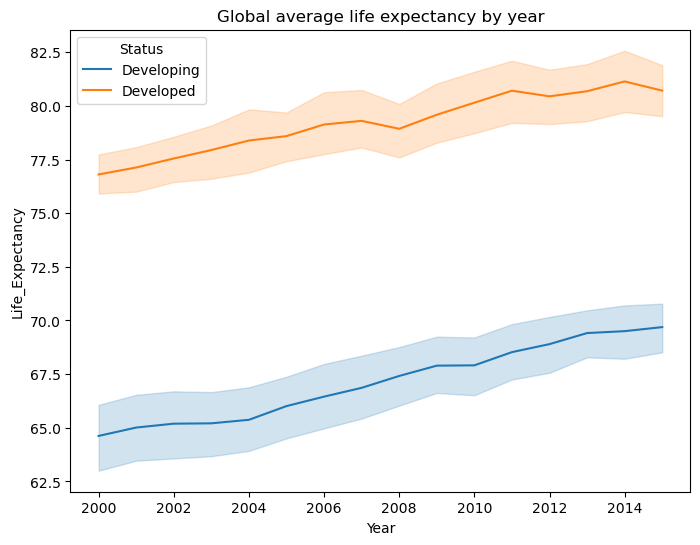

In [64]:
# Line plot: global average life expectancy by year (with status as hue).

plt.figure(figsize = (8,6))
sns.lineplot(data = df,  x = 'Year' , y = 'Life_Expectancy', hue = 'Status')
plt.title('Global average life expectancy by year')
plt.xlabel('Year')
plt.ylabel("Life_Expectancy")
plt.show()

           

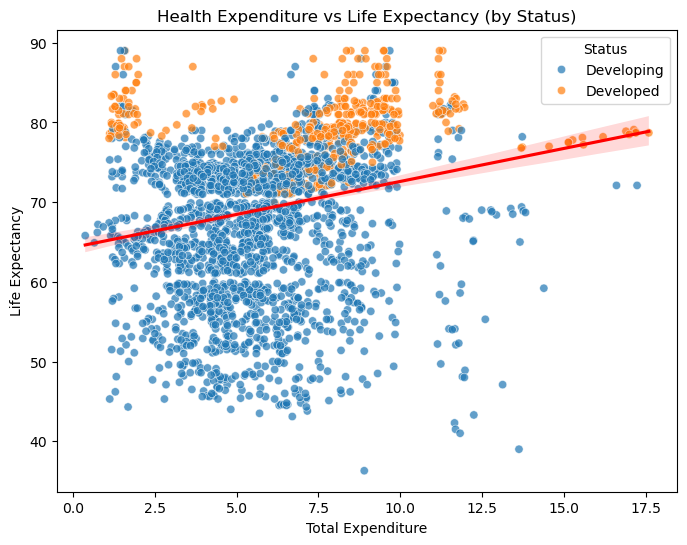

In [65]:
# Scatter + regression: health expenditure per capita vs life expectancy (log-scale if needed), color by status.

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Total_Expenditure', y='Life_Expectancy', hue='Status', alpha=0.7)
sns.regplot(data=df, x='Total_Expenditure', y='Life_Expectancy', scatter=False, color='red')
plt.title('Health Expenditure vs Life Expectancy (by Status)')
plt.xlabel('Total Expenditure')
plt.ylabel('Life Expectancy')
plt.show()

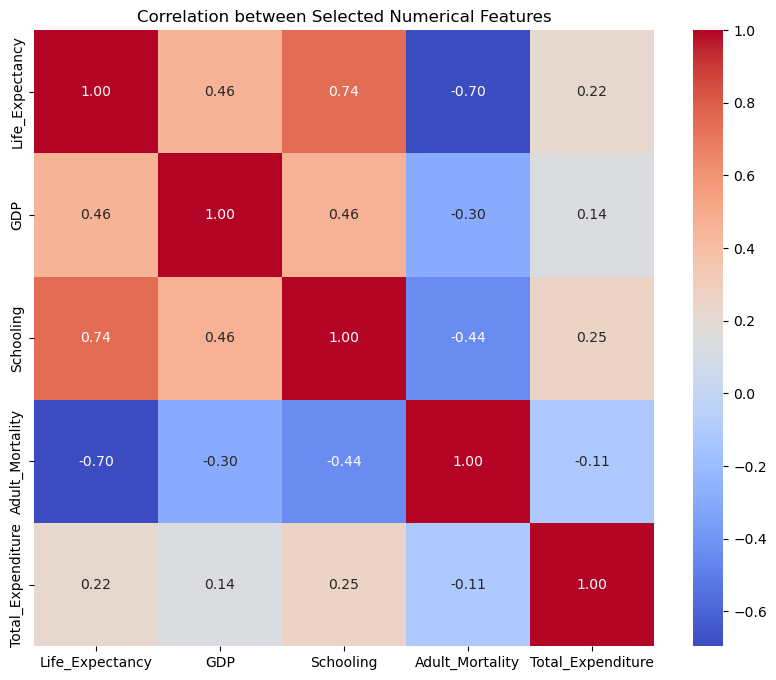

In [66]:
# Heatmap: correlation matrix of selected features
selected = ['Life_Expectancy', 'GDP', 'Schooling', 'Adult_Mortality', 'Total_Expenditure']
corr_matrix = df[selected].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Selected Numerical Features')
plt.show()

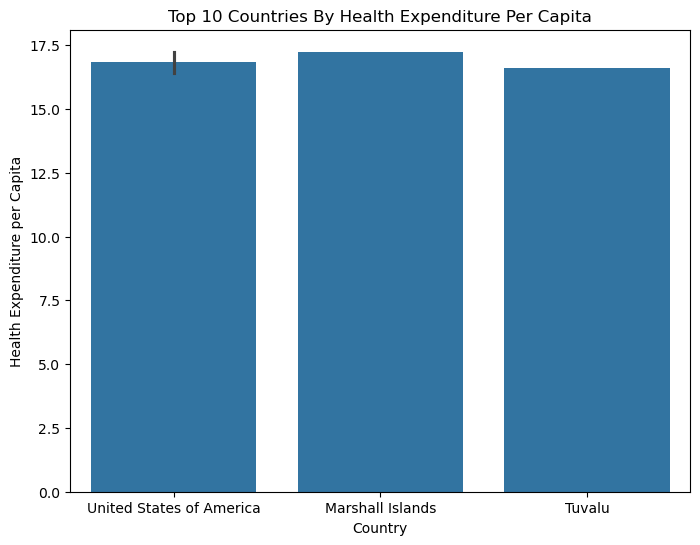

In [67]:
# Bar chart: top 10 countries by health expenditure per capita (latest year).
top_10 = df.sort_values(by = 'Total_Expenditure', ascending = False).head(10)

plt.figure(figsize = (8,6))
sns.barplot(data = top_10,  x = 'Country' , y = 'Total_Expenditure')
plt.title('Top 10 Countries By Health Expenditure Per Capita')
plt.xlabel('Country')
plt.ylabel('Health Expenditure per Capita')
plt.show()


In [73]:
df['Year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000])

In [80]:
# Step 1: Choose a few sample countries (you can change these)
countries = ['Pakistan', 'India', 'China', 'United States of America', 'Japan']

In [81]:
# Step 2: Filter only those countries
subset = df[df['Country'].isin(countries)]

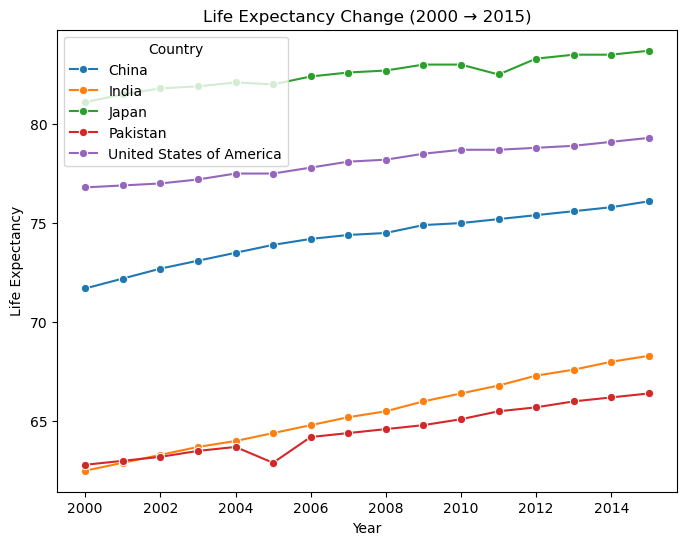

In [82]:
# Step 3: Make a simple line chart
plt.figure(figsize=(8,6))
sns.lineplot(data=subset, x='Year', y='Life_Expectancy', hue='Country', marker='o')
plt.title('Life Expectancy Change (2000 → 2015)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

### Key findings:

Overall association: Countries with higher GDP per capita and higher health expenditure per capita generally have higher life expectancy. The correlation analysis in the notebook shows a clear positive relationship — richer countries tend to live longer.

Diminishing returns: The scatter/regression analysis indicates diminishing returns: after a certain spending level, extra health spending produces smaller life-expectancy gains. In other words, more money helps a lot at low levels, but less so at high levels.

Efficiency leaders: Several countries achieve above-average life expectancy with moderate spending — these are efficiency leaders (good outcomes for relatively lower per-capita health spending). They’re useful models for policy.

Outliers and concerns: A handful of countries spend a lot but do not enjoy correspondingly high life expectancy — these are outliers that likely face efficiency problems (health system design, inequity, or non-health determinants). Conversely, some lower-spending countries punch above their weight in life expectancy — worth studying for best practices.

Trends over time: The 3-year rolling averages show steady global improvement in life expectancy over the analyzed period, but gains are uneven across regions; lower-income regions improved slower and remain behind.

Policy levers: Schooling and reductions in adult/infant mortality show strong relationships with life expectancy in the correlation matrix — suggesting investments in education and primary care can yield large health gains alongside direct health spending.

Practical recommendations (actionable):

Prioritise efficiency: For countries that are high spenders but low performers, conduct audits to reallocate spending toward primary care, preventive services, and universal access.

Target low-spending countries: In lower-income settings, even modest increases in targeted health spending (vaccination, primary care) can yield large life-expectancy gains.

Adopt best practices from efficiency leaders: Study health delivery models from countries that achieve high outcomes with moderate spending and pilot similar interventions regionally.

Use composite monitoring metrics: Track life_expectancy, health_expenditure_per_capita, and spending_efficiency simultaneously to spot regressions early.

Incorporate non-health interventions: Since schooling and economic development tightly correlate with life expectancy, coordinate health policy with education and social programs for maximal effect.



## One-line summary:
Invest smartly, especially in primary care, preventive measures, and systems efficiency, because in many countries a rebalanced health spending strategy will improve life expectancy more than simply increasing budgets.